In [4]:
import numpy as np
import pandas as pd
import scipy as sc
import math 
import matplotlib.pyplot as plt
from random import random
from sklearn import linear_model
import statsmodels.api as sm

### Loading Data

In [5]:
df = pd.read_excel(r'C:\Users\bramg\Documents\Education_7.xlsx').fillna(0)
df2 = pd.read_excel(r'C:\Users\bramg\Documents\Education_7.xlsx')

columns = list(df.columns)
print(columns)
vX = df[columns[5:7]]
vY = df[columns[11:13]]

vMath = df[['Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D']].to_numpy()
vLanguage = df[['Dutch', 'English']].to_numpy()
vOther = df[['Latin', 'Greek']].to_numpy()
vHS = df[['Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D', 'Dutch', 'English', 'Latin', 'Greek']].to_numpy()
vUni = df[["Number of ECT's"]]

vUniMath = df[['Mathematics Univ']].to_numpy()
vUniDutch = df[['Dutch Univ']].to_numpy()

['Student', 'Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D', 'Dutch', 'English', 'Latin', 'Greek', 'Studies', "Number of ECT's", 'Mathematics Univ', 'Dutch Univ']


In [6]:
def scatter(data1, data2):
    plt.scatter(data1, data2)
    plt.show()

In [7]:
def histogram(data1, data2):
    plt.hist(data1, bins=30, alpha=0.5)
    plt.hist(data2, bins=30, alpha=0.5)
    plt.show()

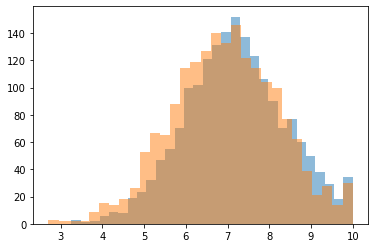


################################################################

       Mathematics A  Mathematics C  Mathematics B  Mathematics D  \
count     552.000000     374.000000     928.000000     404.000000   
mean        7.365036       7.417914       7.436099       7.546782   
std         1.487001       1.480970       1.485696       1.413271   
min         5.000000       5.000000       5.000000       5.000000   
25%         6.100000       6.025000       6.200000       6.300000   
50%         7.300000       7.450000       7.400000       7.600000   
75%         8.625000       8.675000       8.700000       8.700000   
max        10.000000      10.000000      10.000000      10.000000   

             Dutch      English       Latin       Greek  Number of ECT's  \
count  1854.000000  1854.000000  868.000000  868.000000      1854.000000   
mean      7.524865     7.538835    7.472696    7.534447        38.679612   
std       1.465815     1.464718    1.455342    1.462771        12.448354   
min    

In [8]:
def main():
    #descriptive anlaysis: 
    #scatter:
    histogram(vUniDutch, vUniMath)
    
    print("\n################################################################\n")
    print(df2.iloc[:,1:].describe())
main()

In [9]:
#Correlation between every variable: 

def correlationData(data): 
    correlation_df = df.corr()
    print(correlation_df) 

In [10]:
def main():
    print("\n################################################################\n")
    correlationData(df)
main()


################################################################

                   Student  Mathematics A  Mathematics C  Mathematics B  \
Student           1.000000      -0.011844      -0.001659       0.010744   
Mathematics A    -0.011844       1.000000      -0.310589      -0.609850   
Mathematics C    -0.001659      -0.310589       1.000000      -0.472652   
Mathematics B     0.010744      -0.609850      -0.472652       1.000000   
Mathematics D     0.006387      -0.326917      -0.253371       0.505648   
Dutch             0.062370      -0.019103       0.016050       0.006902   
English          -0.023641       0.019725      -0.007046      -0.011283   
Latin             0.010648      -0.004497      -0.062371       0.062983   
Greek             0.009876      -0.002304      -0.064101       0.056131   
Number of ECT's  -0.010538       0.102934       0.047115       0.034254   
Mathematics Univ -0.007394       0.083952       0.041801       0.105780   
Dutch Univ       -0.002853       

## Mutliple Linear Regression Model

In [11]:
def multiLinearRegression(X, y, features):
    sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary(xname=features))

In [12]:
vY = vUniMath
features = list(df.iloc[:, 1:9].columns)
vX = vHS
print('OLS Mathematics:\n')
multiLinearRegression(vX, vY, features)

OLS Mathematics:

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              9625.
Date:                Thu, 13 Jan 2022   Prob (F-statistic):                        0.00
Time:                        10:36:28   Log-Likelihood:                         -2775.4
No. Observations:                1854   AIC:                                      5567.
Df Residuals:                    1846   BIC:                                      5611.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [19]:
 #Uni Dutch: 
vY = vUniDutch
vX = vHS
features = list(df.iloc[:, 1:9].columns)
print('OLS Dutch: \n')
multiLinearRegression(vX, vY, features)

OLS Dutch: 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              8676.
Date:                Thu, 13 Jan 2022   Prob (F-statistic):                        0.00
Time:                        10:38:58   Log-Likelihood:                         -2926.1
No. Observations:                1854   AIC:                                      5868.
Df Residuals:                    1846   BIC:                                      5912.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------